<a href="https://colab.research.google.com/github/Osstrinha/Fisica-Computacional-2/blob/main/Lista_6_Fis_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
print(sys.version)

print("link para arquivo: https://colab.research.google.com/drive/1migogM0wezBhXzBCHKQQqmZ3fi7O3f44?usp=sharing")

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
link para arquivo: https://colab.research.google.com/drive/1migogM0wezBhXzBCHKQQqmZ3fi7O3f44?usp=sharing


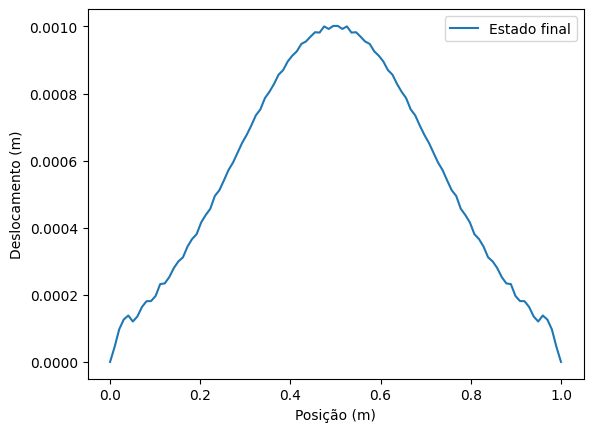

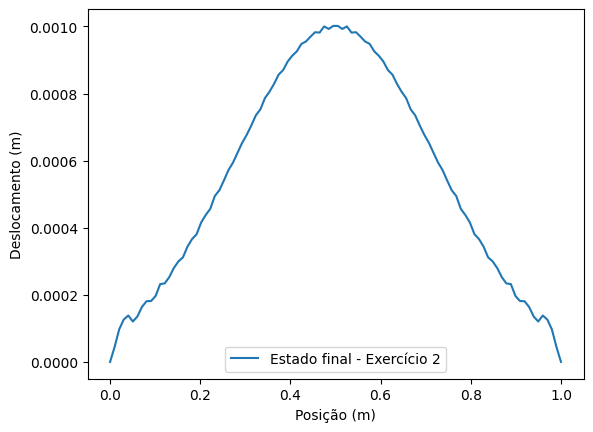

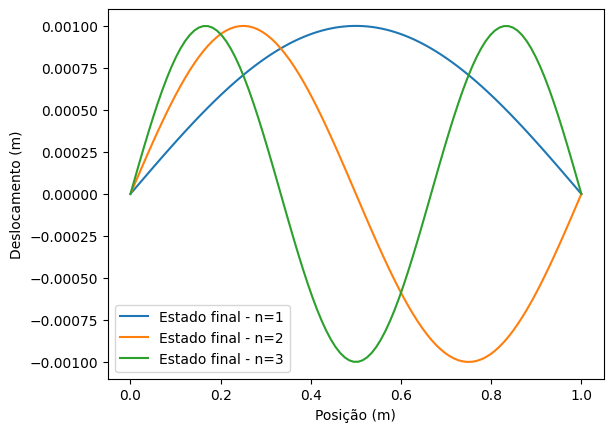

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
L = 1.0  # Comprimento da corda (m)
N = 100  # Número de pontos espaciais
dx = L / (N - 1)  # Passo espacial

T = 1.0  # Tração da corda (N)
rho = 1.0  # Densidade linear (kg/m)
v = np.sqrt(T / rho)  # Velocidade da onda

dt = 0.01  # Passo temporal (s)
tmax = 6.0  # Tempo máximo de simulação (s)

x = np.linspace(0, L, N)  # Eixo espacial
timesteps = int(tmax / dt)  # Número de passos temporais

# Inicializando a corda
y = np.zeros(N)  # Estado inicial
y_prev = np.zeros(N)  # Estado no instante anterior
y_next = np.zeros(N)  # Próximo estado

# Condições iniciais exercício 1
a0 = 1e-3  # Amplitude inicial
x0 = 0.5  # Posição inicial
sigma = 0.1  # Largura da perturbação

y = a0 * np.exp(-((x - x0) ** 2) / sigma) # O resultado sai melhor com sigma ** 2
y_prev[:] = y  # Para a condição y(x, t = dt) = y(x, 0)

# Loop de evolução temporal
for _ in range(timesteps):
    for i in range(1, N - 1):
        y_next[i] = 2 * y[i] - y_prev[i] + (v * dt / dx) ** 2 * (y[i + 1] - 2 * y[i] + y[i - 1])

    # Atualizando estados
    y_prev[:] = y
    y[:] = y_next

# Plotando o resultado
plt.plot(x, y, label='Estado final')
plt.xlabel('Posição (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()


# Reinicializando a corda
y = np.zeros(N)  # Estado inicial
y_prev = np.zeros(N)  # Estado no instante anterior
y_next = np.zeros(N)  # Próximo estado

# Condições iniciais Exercício 2
a0 = 1e-3  # Amplitude inicial
x0 = 0.5  # Posição inicial
sigma = 0.1  # Largura da perturbação

y = a0 * np.exp(-((x - x0) ** 2) / sigma)
y_prev[:] = np.roll(y, int(-v * dt / dx))  # Deslocamento inicial

# Loop de evolução temporal
for _ in range(timesteps):
    for i in range(1, N - 1):
        y_next[i] = 2 * y[i] - y_prev[i] + (v * dt / dx) ** 2 * (y[i + 1] - 2 * y[i] + y[i - 1])

    # Atualizando estados
    y_prev[:] = y
    y[:] = y_next

# Plotando o resultado
plt.plot(x, y, label='Estado final - Exercício 2')
plt.xlabel('Posição (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()

# Reinicializando a corda
y = np.zeros(N)
y_prev = np.zeros(N)
y_next = np.zeros(N)

# Condições iniciais Exercício 3

a0 = 1e-3  # Amplitude inicial
for n in [1, 2, 3]:
    k = n * np.pi / L
    y = a0 * np.sin(k * x)
    y_prev[:] = y  # Condição inicial estacionária

    # Loop de evolução temporal
    for _ in range(timesteps):
        for i in range(1, N - 1):
            y_next[i] = 2 * y[i] - y_prev[i] + (v * dt / dx) ** 2 * (y[i + 1] - 2 * y[i] + y[i - 1])

        # Atualizando estados
        y_prev[:] = y
        y[:] = y_next

    # Plotando o resultado
    plt.plot(x, y, label=f'Estado final - n={n}')

plt.xlabel('Posição (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()